# Deploying Machine Learning and Data Science Projects as Public Web Applications

## How to take data science projects from the local Jupyter Notebook development environment and publish them as publicly available web applications

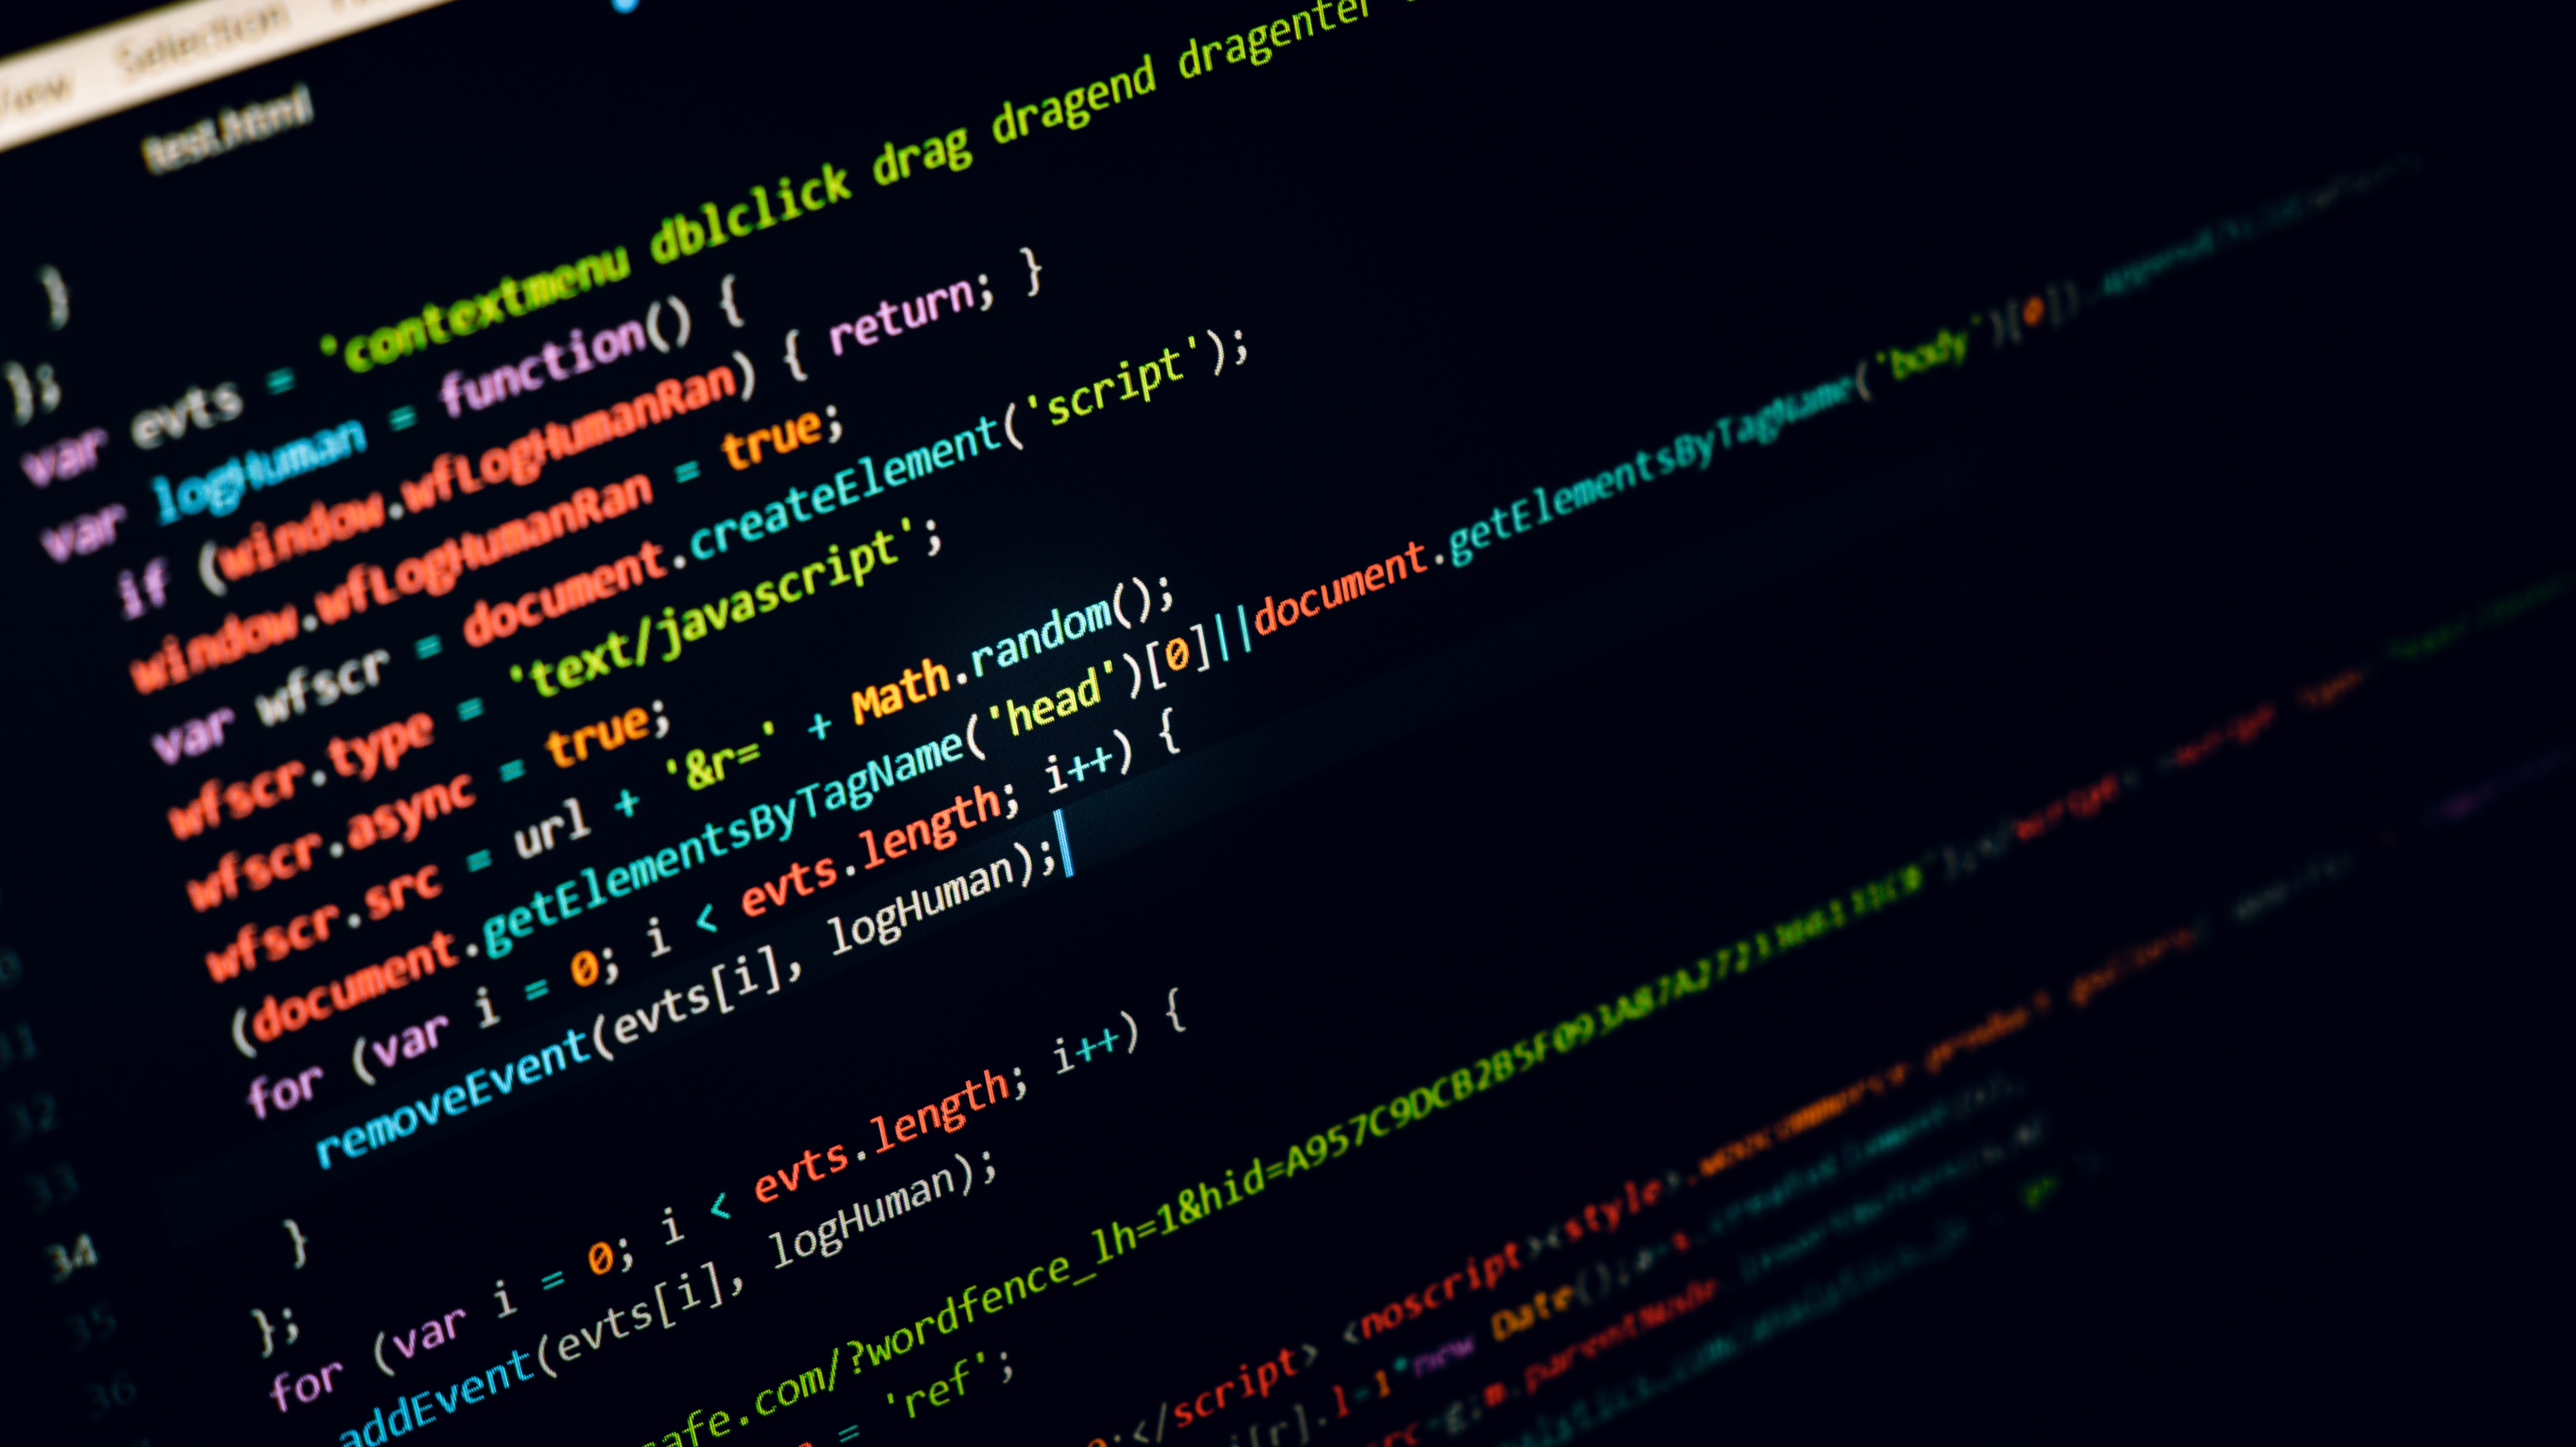
Photo by <a href="https://unsplash.com/@dlanor_s?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">RoonZ</a> on <a href="https://unsplash.com/s/photos/deploy-code?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Introduction

Many useful machine learning and data science applications are developed in the Jupyter Notebook environment, but when they are complete and ready to share with internal customers or the external data science community how can those notebooks be shared?

There are many different ways to achieve this but this article explains how to deploy Jupyter Notebooks using voila and mybinder and this approach is used because it is fast, effective and free.

There are a few nuances in the configuration and setup and the rest of the article explains how to achieve this deployment in easy-to-follow steps with detailed explanations and screen-shots ...

### Step 1: Write an "App" in a Jupyter Notebook

The first step is to write an "app" in a Jupyter Notebook that can be displayed or rendered in such a way that a user can interact with it.

Most data scientists are more familiar with writing machine learning algorithms than web applications but fortunately there is an easy-to-use library that enables Jupyter Notebooks to be delivered as web applications and that is IPython widgets (ipywidgets).

Explaining how to create an interactive app using ipywidgets is beyond the scope of this article but there is a set of excellent documentation available online to get you started - https://ipywidgets.readthedocs.io/en/stable/user_guide.html

#### Step 1a: Creating an Example App

We are going to need an app that uses ipywidgets to use in this example and for that I have modified a Notebook I wrote about in a previous article that calculates confidence intervals for normal and binomial distributions.

If you want to check out that article, which contains all the details and explanations, please have a look at this link - https://towardsdatascience.com/how-to-build-an-interactive-confidence-interval-calculator-in-python-6aea08d69be3

In the mean-time, here is the modified code that is going to be used for our example -

In [1]:
# Imports ...
from ipywidgets import Label, FloatSlider, FloatText, BoundedIntText, Button, Output, VBox, HBox

import scipy.stats as stats
import numpy as np

# Helpder functions to calculate the confidence intervals ...
def normal_distribution_ci(confidence, x_bar, sigma, n):
    z_score = stats.norm.interval(confidence)[1]
    sigma_over_root_n = sigma / np.sqrt(n)
    ci = [x_bar - z_score * sigma_over_root_n, x_bar + z_score * sigma_over_root_n]
    return ci

def binomial_distribution_ci(confidence, p_hat, n):
    z_score = stats.norm.interval(confidence)[1]
    rhs = z_score * np.sqrt(p_hat*(1-p_hat))/n
    ci = [p_hat - rhs, p_hat + rhs]
    return ci

# IPython widget controls for confidence intervals of normal and binomial distributions ...
normal_label = Label("Normal Distribution Confidence Interval Calculator")
normal_confidence = FloatSlider(description="confidence", value=0.95, min=0.5, max=0.99, step=0.01)
normal_x_bar_input = FloatText(value=75.7, min=0, max=100000, step=0.01, description='x bar:', disabled=False)
normal_sigma_input = FloatText(value=7.3, min=0, max=100000, step=1, description='sigma:', disabled=False)
normal_n_input = BoundedIntText(value=30, min=0, max=100000, step=1, description='n:', disabled=False)
normal_button = Button(description="Calculate")
normal_output = Output()

binomial_label = Label("Binomial Distribution Confidence Interval Calculator")
binomial_confidence = FloatSlider(description="confidence", value=0.95, min=0.5, max=0.99, step=0.01)
binomial_phat = FloatSlider(description="p hat", value=0.78, min=0.0, max=1.0, step=0.01)
binomial_n_input = BoundedIntText(value=30, min=0, max=100000, step=1, description='n:', disabled=False)
binomial_button = Button(description="Calculate")
binomial_output = Output()

# Button click event handlers ...
def normal_button_on_click(b):
    ci = normal_distribution_ci(normal_confidence.value, normal_x_bar_input.value, normal_sigma_input.value, normal_n_input.value)
    
    normal_output.clear_output()
    with normal_output:
        print(f"The population mean lies between {ci[0]:.2f} and {ci[1]:.2f} with {normal_confidence.value:.0%} confidence")
        
def binomial_button_on_click(b):
    ci = binomial_distribution_ci(binomial_confidence.value, binomial_phat.value, binomial_n_input.value)
    
    binomial_output.clear_output()
    with binomial_output:
        print(f"The population mean lies between {ci[0]:.1%} and {ci[1]:.1%} with {binomial_confidence.value:.0%} confidence")
        
normal_button.on_click(normal_button_on_click)
binomial_button.on_click(binomial_button_on_click)

vbox_normal = VBox([normal_label, normal_confidence, normal_x_bar_input, normal_sigma_input, normal_n_input, normal_button, normal_output])
vbox_binomial = VBox([binomial_label, binomial_confidence, binomial_phat, binomial_n_input, binomial_button, binomial_output])

VBox([vbox_normal, vbox_binomial])

It looks more complicated than it is as there are separate lines of code for each control, but if you want a detailed explanation of the code just use the link to my previous article - https://towardsdatascience.com/how-to-build-an-interactive-confidence-interval-calculator-in-python-6aea08d69be3

### Step 2: Deploy the App Locally

We now have some data science code to calculate confidence intervals that renders inside a Jupyter Notebook. The output is reasonably well organised and it works quite nicely, but there are a few problems -

1. If we want to distribute it to users, those users have to have access to the Jupyter Notebook environment.
2. The code is all mixed up in the "App" which may confuse users who just want to use the calculator and are not concerned with how it is implemented.

This is where the Voilà Jupyter server extension comes in. 

Once Voilà is installed it will run a Notebook just like Jupyter does but with one important difference. It strips out all of the cell inputs and leaves just the outputs which include ipywidgets and markdown. In this way the python code is removed and what is left is a fully functioning web app.

Voilà must be installed as follows -

1. Install the voila libraries by running ``pip install voila`` from the command line or ``!pip install voila`` from inside a Jupyter Notebook.
2. Enable the extension by running ``jupyter serverextension enable voila –sys-prefix`` either at the command line or with a ``!`` prefix inside a Notebook.
3. Restart your computer, otherwise the new server extension is not picked up and does not start.

Once Voilà is installed and working you can run any Notebook as a web app as follows -

1. Start your Jupyter Notebook application.
2. Edit the URL in the URL bar and replace ``/tree`` with ``/voila`` which should look like this if you are using port 8888 - ``http://localhost:8888/voila`` -

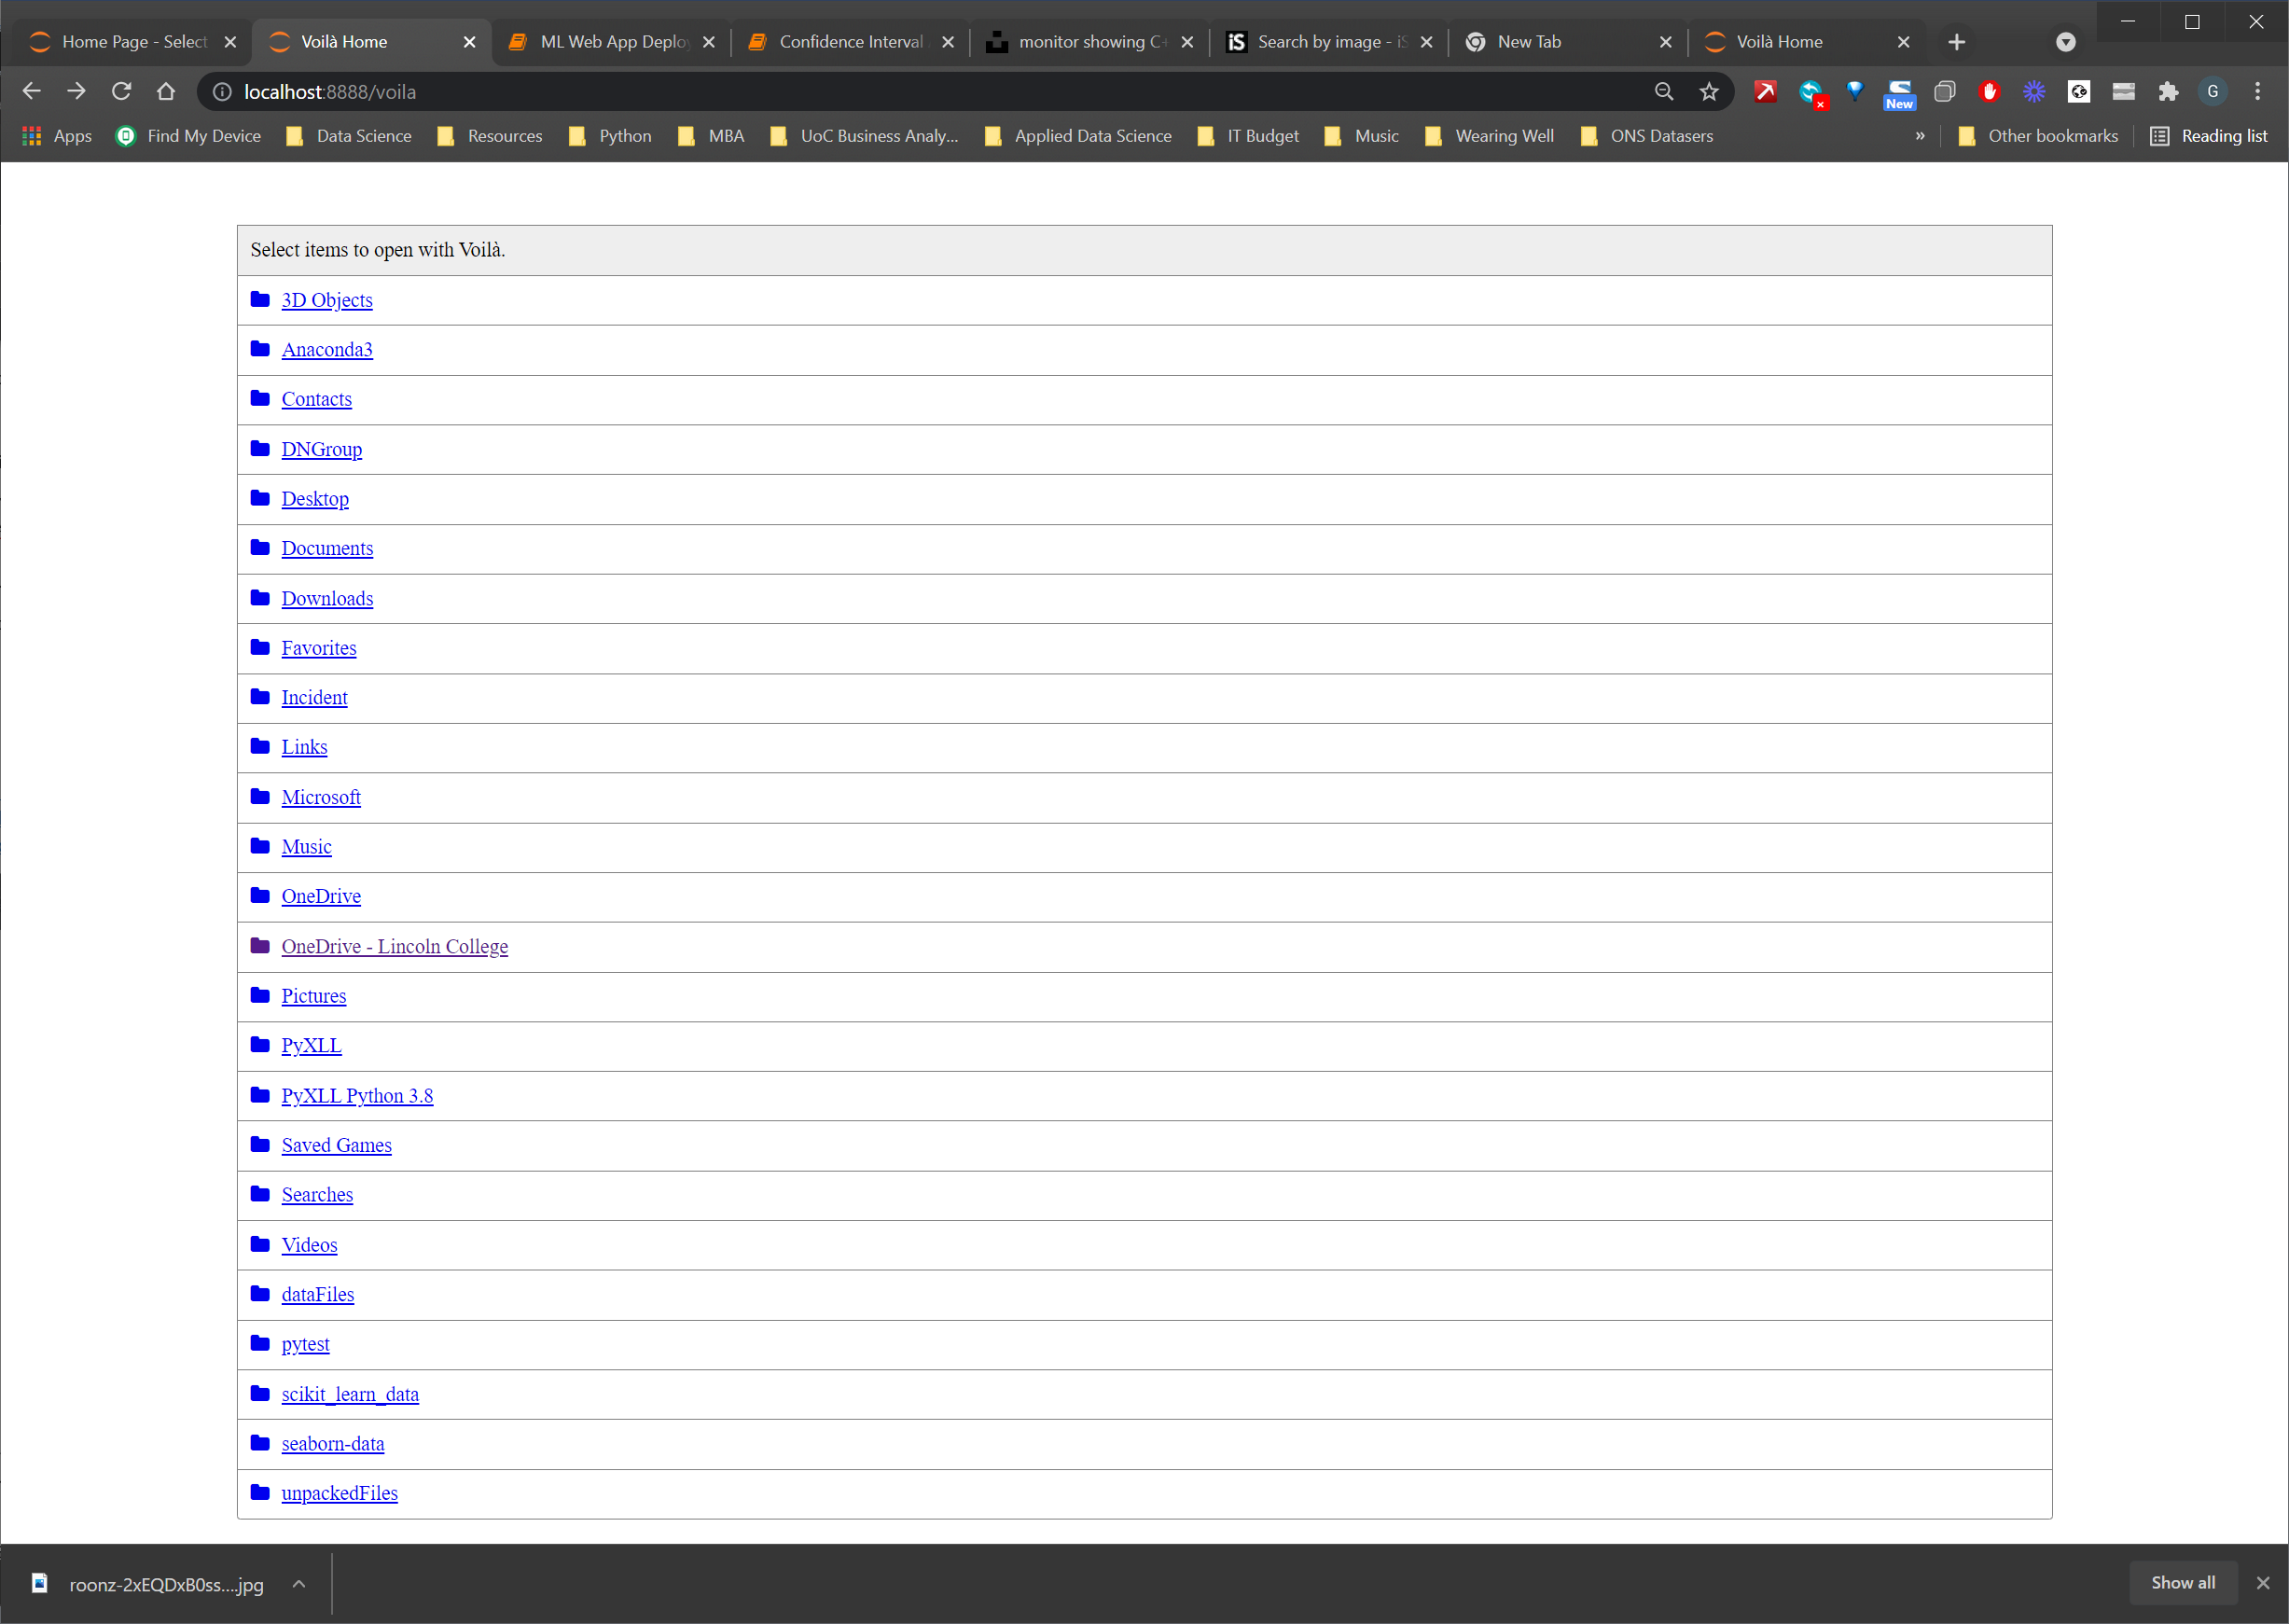
Image by Author

3. Navigate through the folder structure until you find the Notebook you want to run as a web app and click on the .ipynb notebook file.

Your notebook will now render as a fully functioning web application -

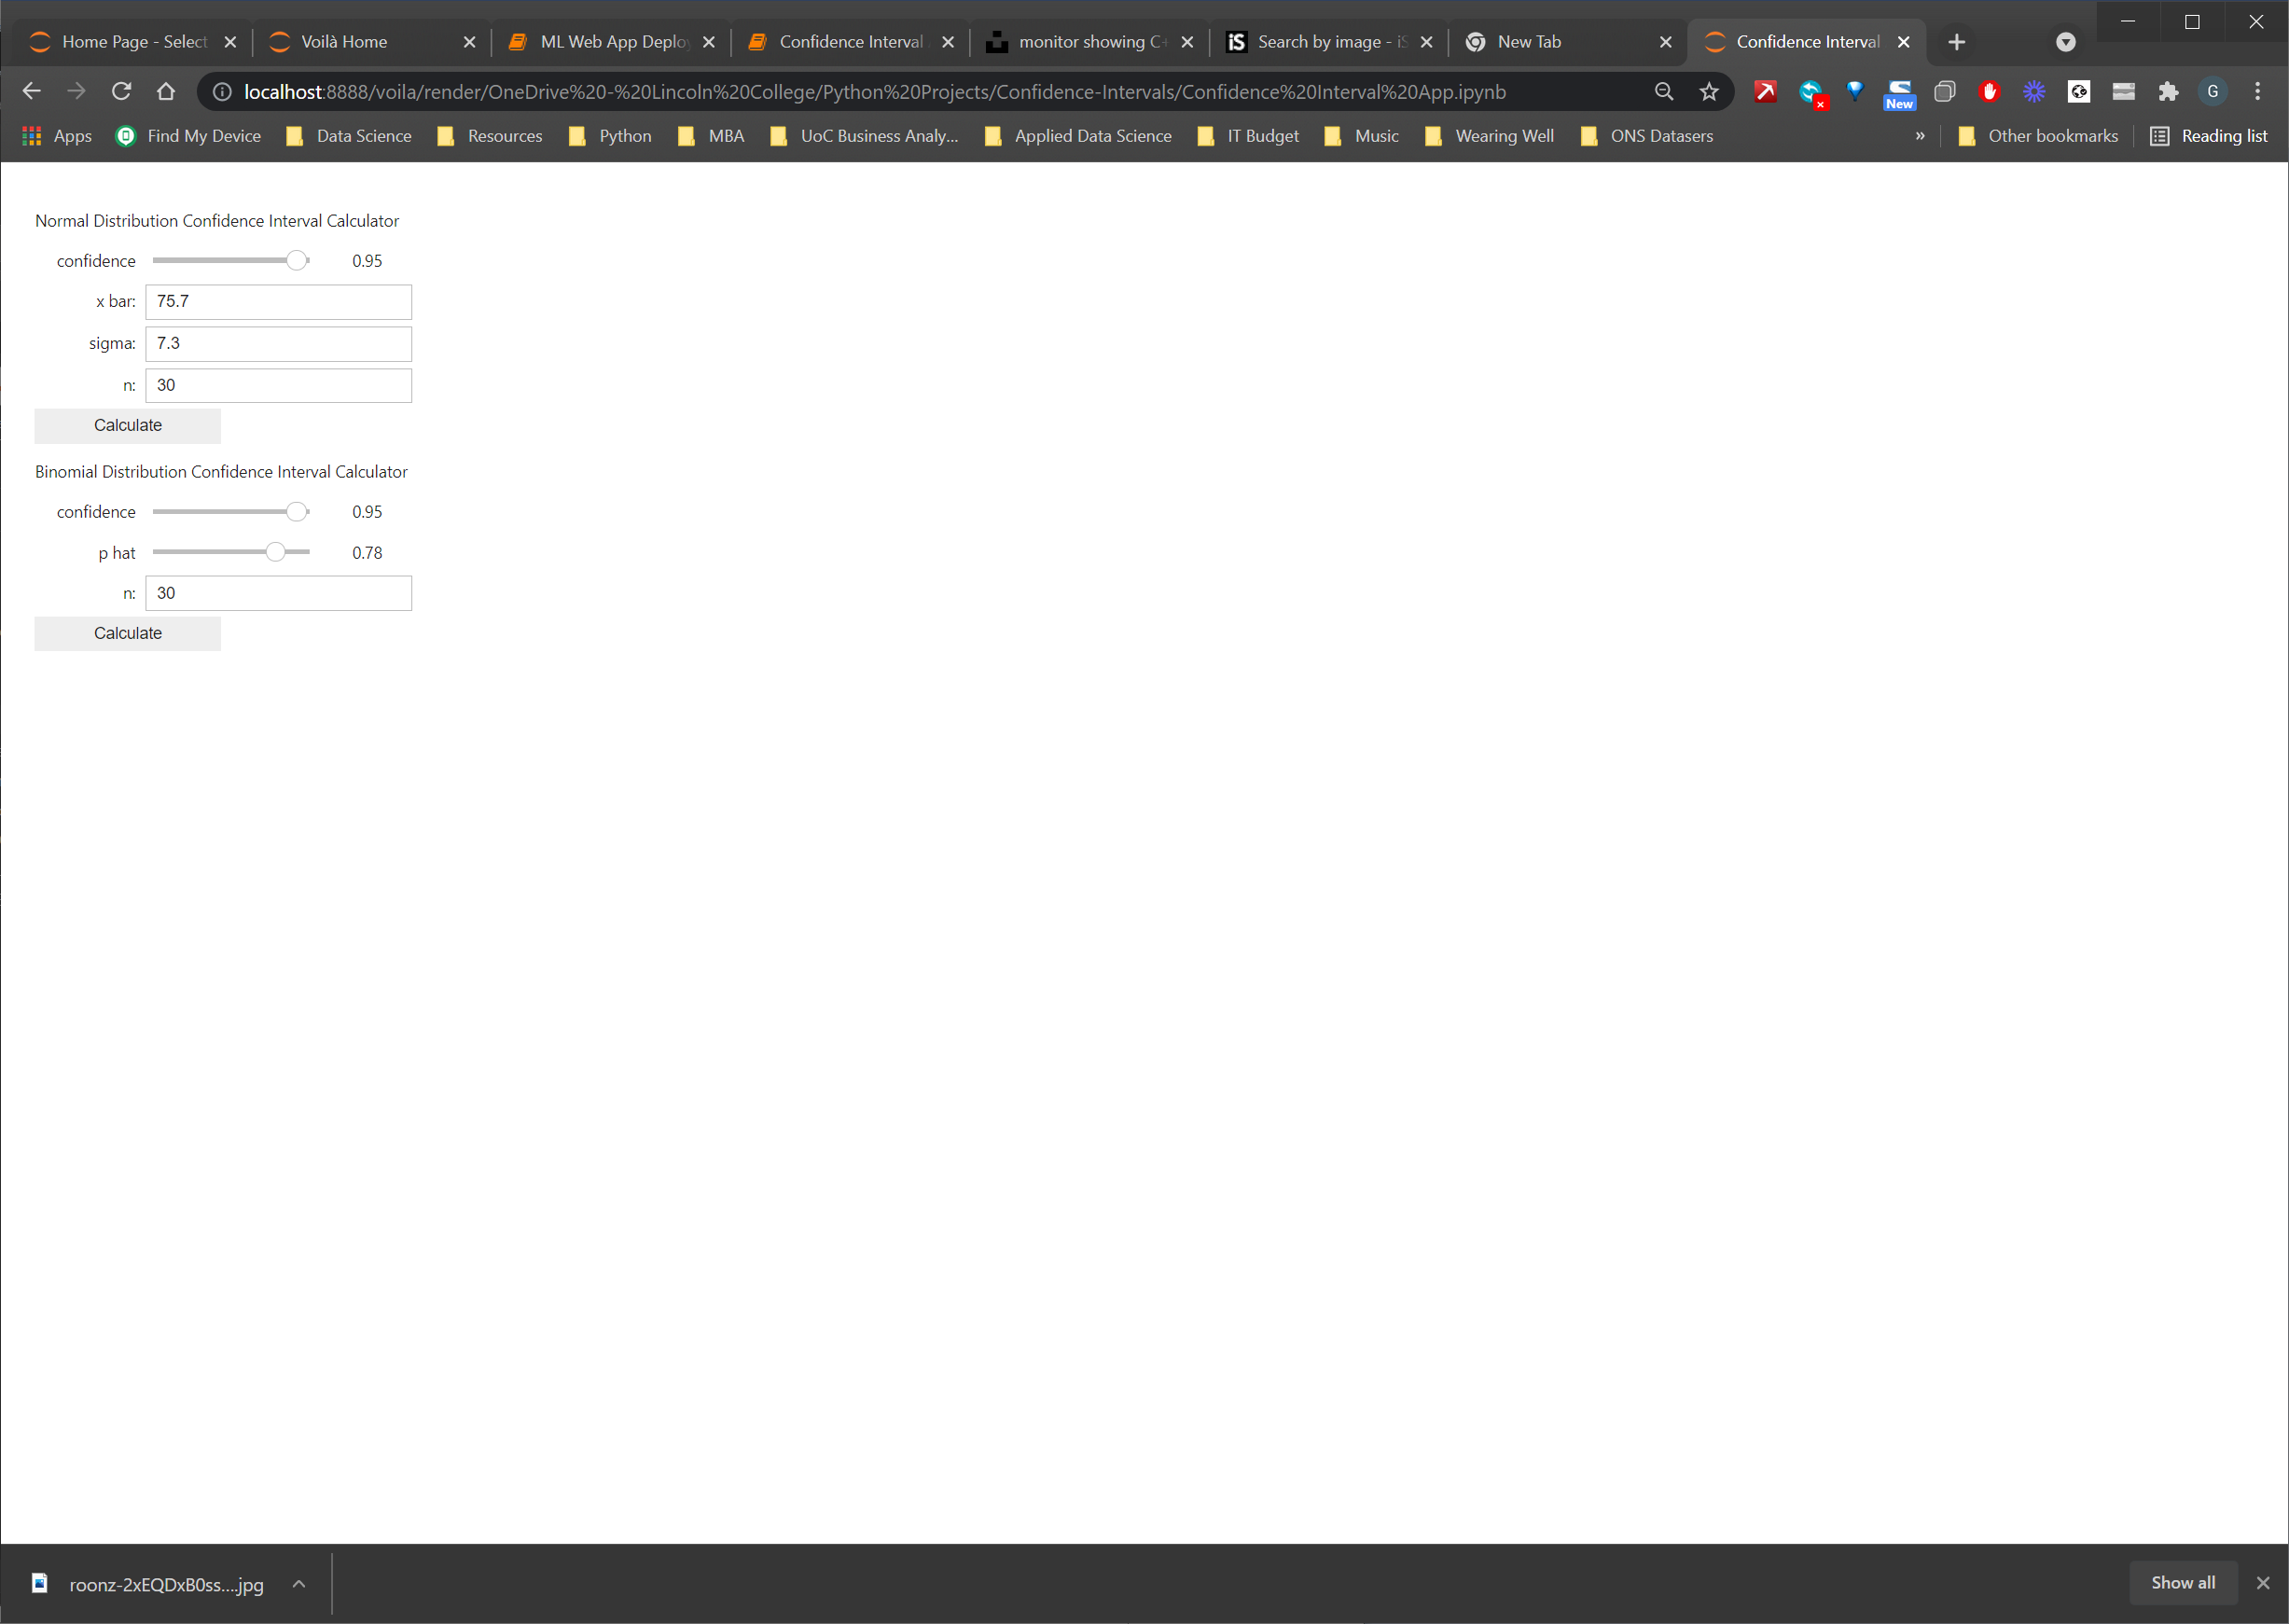
Image by Author

If you would like to review the full documentation for Voilà please use this link - https://voila.readthedocs.io/en/stable/index.html.

Congratulations, you now have a complete, working web app deploying data science code directly into a web browser user interface!

The only issue is that you are the only person in the world who can use it and that defeats the purpose of web apps just a little bit ...

### Step 3: Deploy the App to Github

In order to deploy the app publicly we need to use two further utilities - GitHub and mybinder. GitHub will be used to hold a publicly available repository of the web app source code and mybinder will be used to host the app and its runtime environment and to make a public URL available to users.

There are several ways of creating a GitHub repository. Some data scientists like to do this using the command line but my preference is to use the GitHub desktop application. If you don't already have the desktop application and you would like to follow the next steps exactly you will need to download it and install it using this link - https://desktop.github.com/.

You will also need a GitHub account which you can create by visiting the main GitHub site - https://github.com/.

Start the GitHub desktop app and choose "File | New Repository" ...

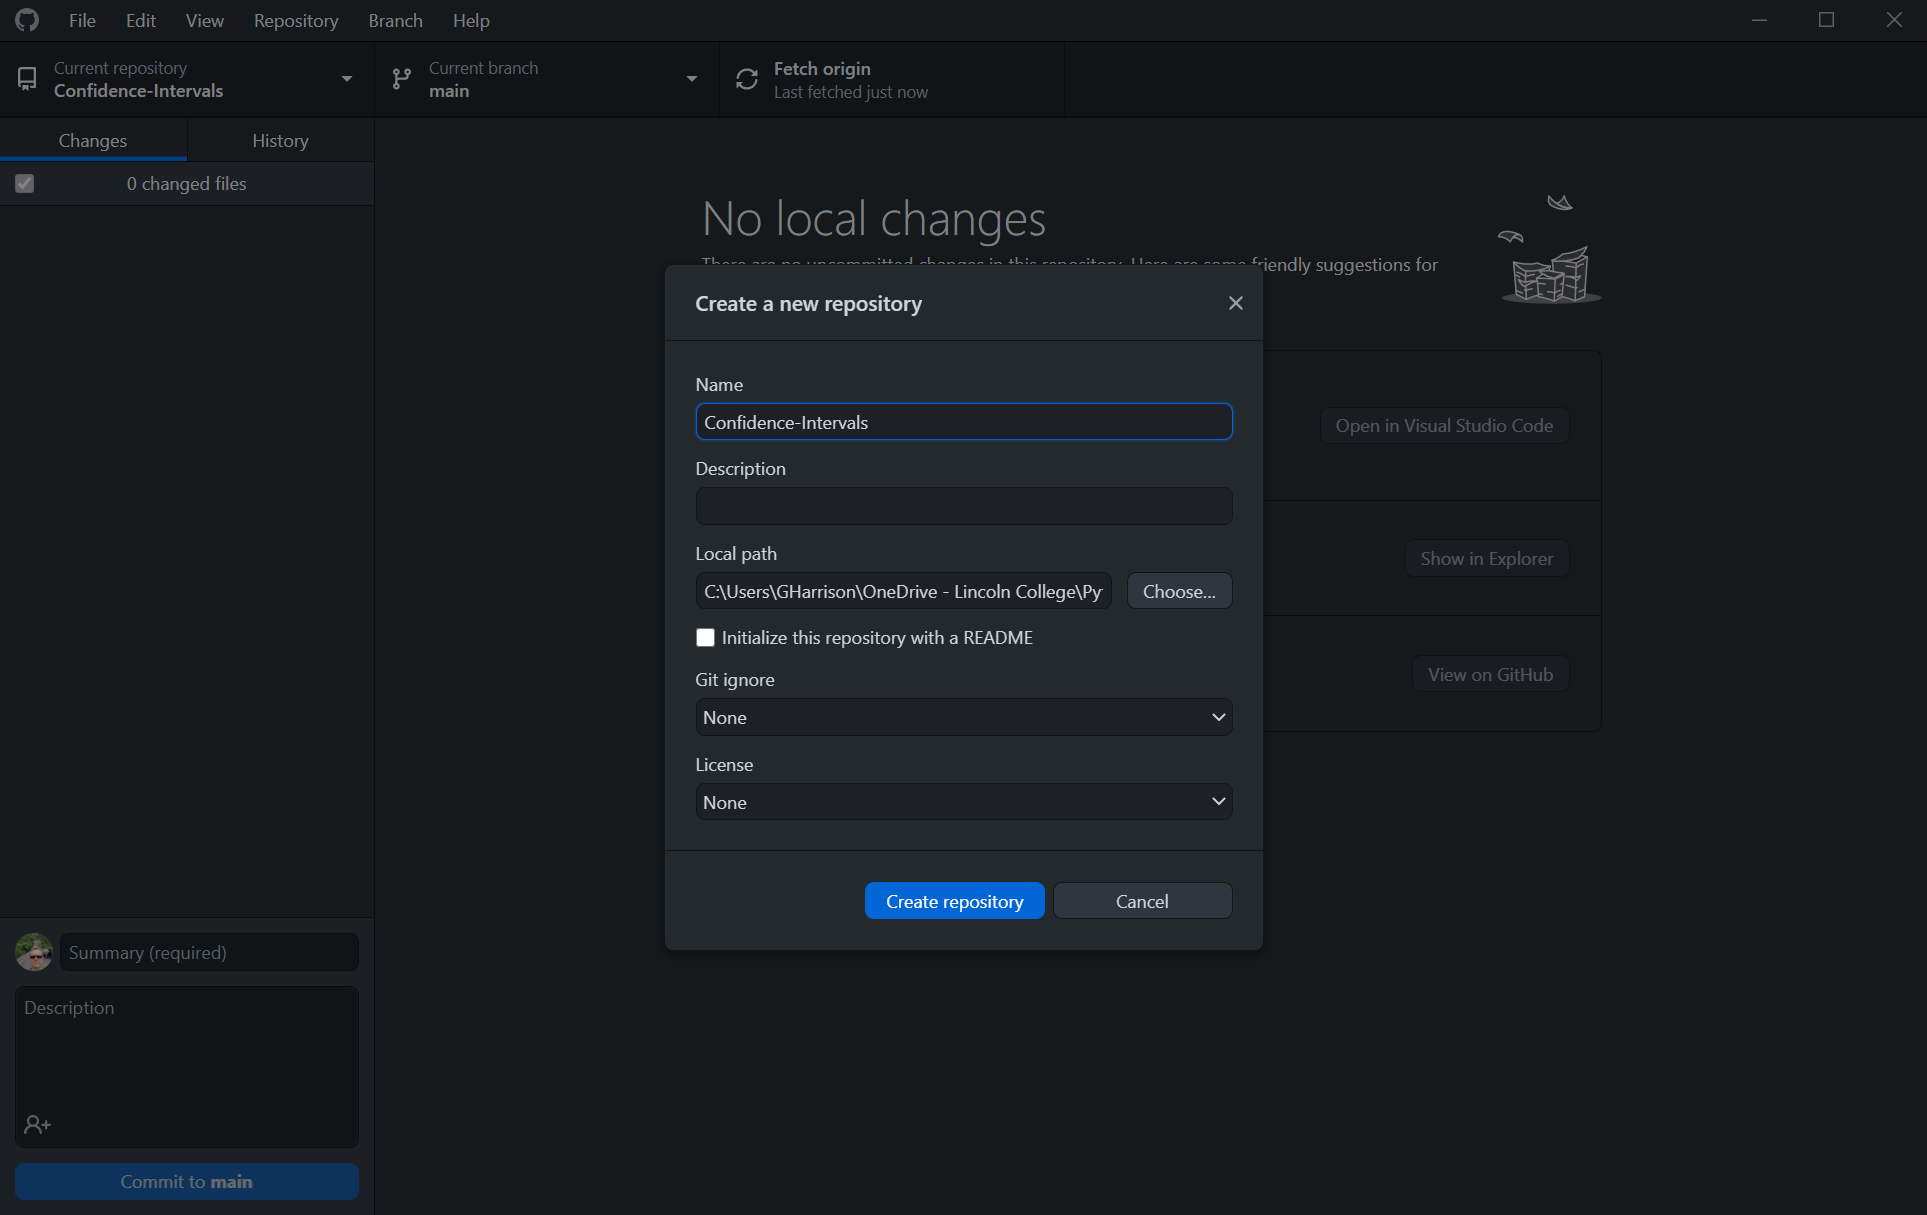
Image by Author

For a long while I found the repository creation counter-intuitive and I struggled to create my code repositories in the right place. I have found these tips to be very useful -

1. When creating a folder that you intend to upload to GitHub as a repository, do not use any spaces in the name. For example use "Confidence-Intervals" rather than "Confidence Intervals".
2. The name you do choose in the "Name" box must exactly match the folder name in which your code and project files are stored.
3. The "Local path" must point exactly to the parent folder of the folder you have used to store your code and not to the folder itself (this is very important as if you get this wrong you will get an empty repository which is the step I kept getting wrong!).
4. When prompted you should leave "private" ticked for code that is private to you but for public web apps and mybinder projects you must untick "private" so that the new repository is public i.e. anyone can browse to it and see it (but not change it).

You can now use the GitHub desktop as your "command centre" for interacting with your GitHub source code repository by committing and pushing changes, opening the code in your selected external editor, viewing the repository files in File Explorer or opening the repository page online inside GitHub ...

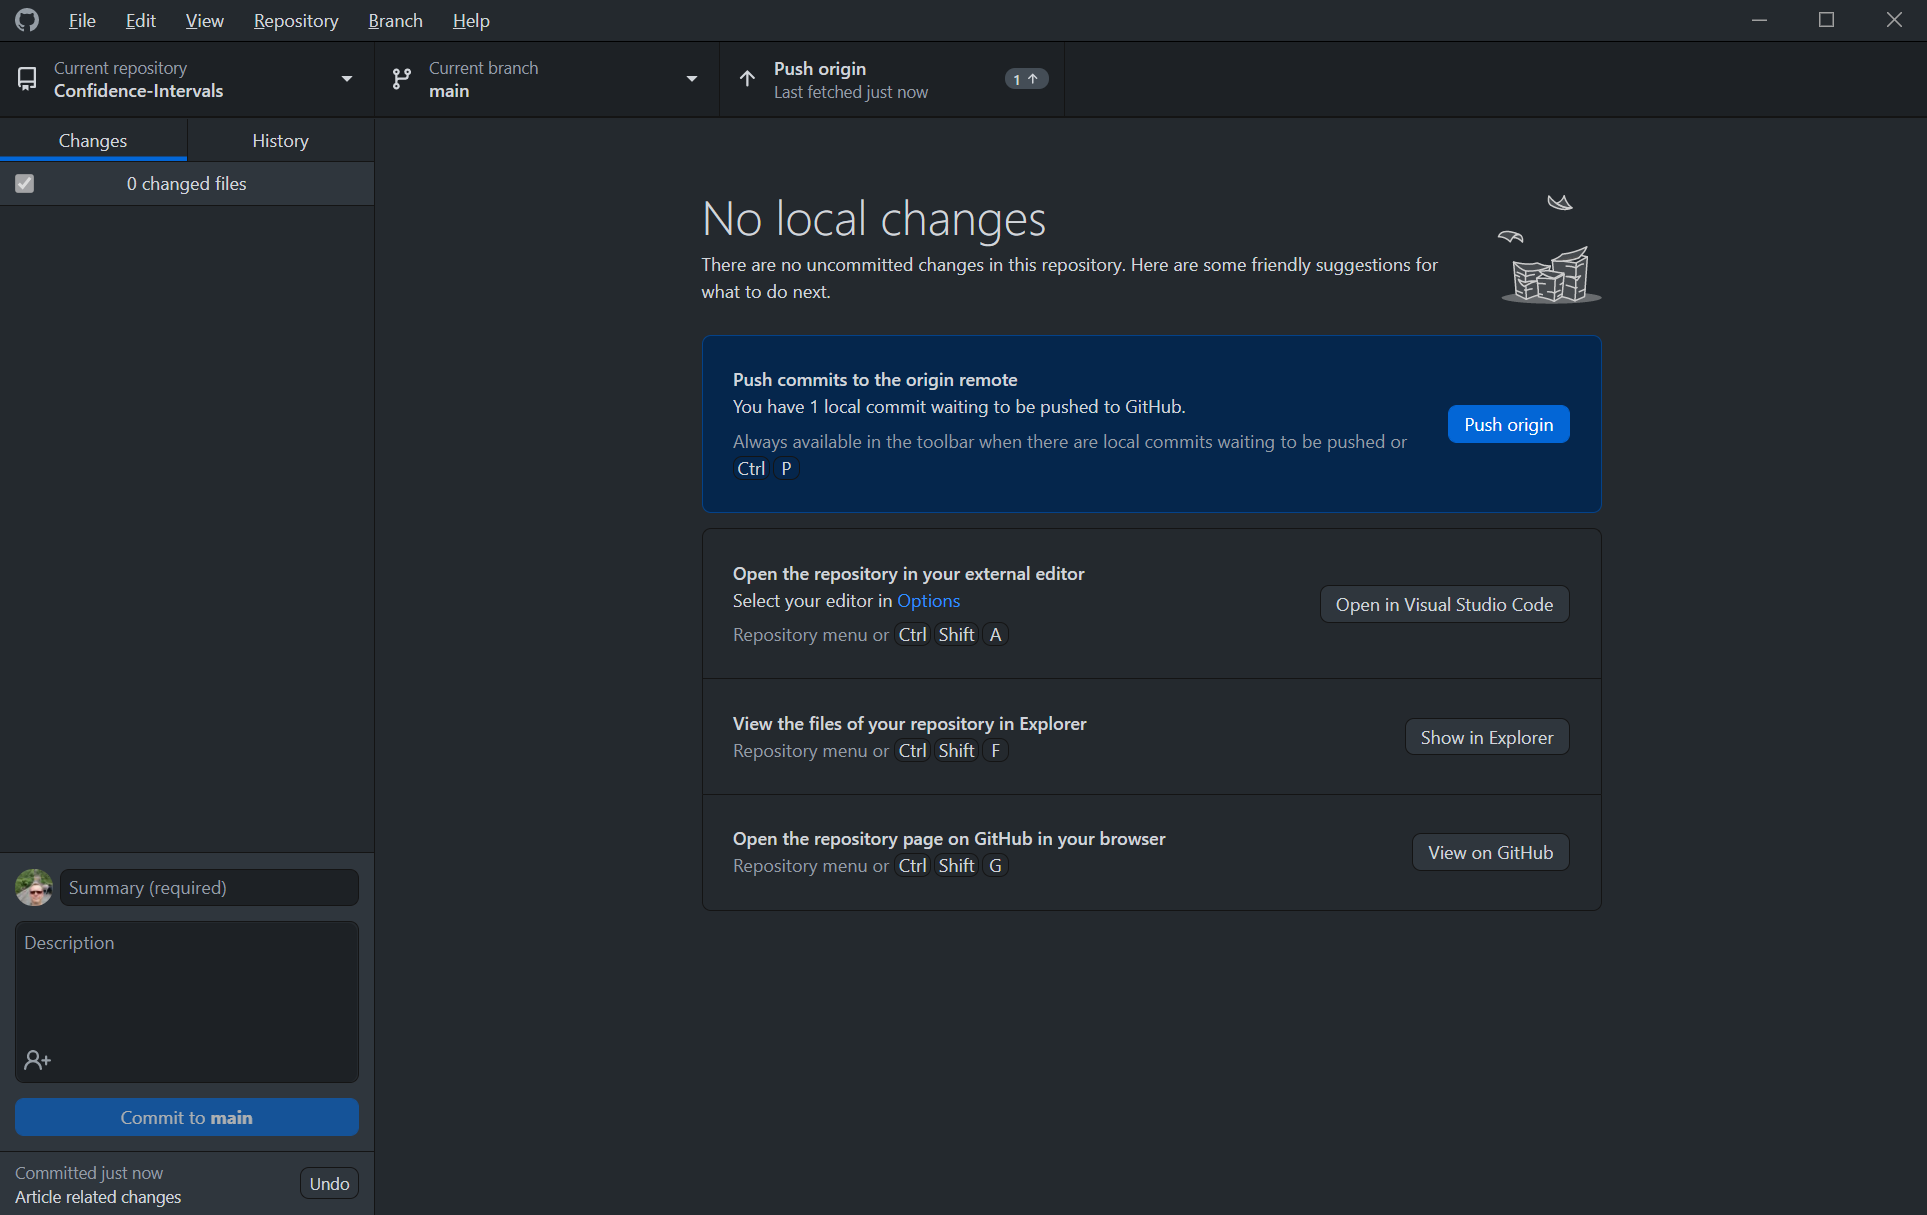
Image by Author

At this stage we have a working local web app and we have deployed it to a public repository in GitHub. Next we need to create a runtime environment in the cloud to execute our app and to finish the deployment and create a public URL -

### Step 4: Create a Cloud Runtime Environment using mybinder.org

There are a number of different cloud based utilities that can be used for this step but I have chosen mybinder.org because it is fast, free and easy to use. There are a couple of draw-backs that we will explore and understand before the end of the article.

#### Step 4.1 Create an "environment.yaml" configuration file

The next task is critical and I have not found many references to it online; before you create a runtime environment using mybinder you must create an "environment.yaml" file in the same directory as your Jupyter Notebook code and then make sure it is committed and pushed to GitHub.

This file tells mybinder exactly what libraries and pre-requisites are required to run your project. If you recall, our web app uses the following libraries ...

In [ ]:
from ipywidgets import Label, FloatSlider, FloatText, BoundedIntText, Button, Output, VBox, HBox

import scipy.stats as stats
import numpy as np

... and crucially it has a dependency on the voila library and the associated server extension.

The "environment.yaml" file required to instruct mybinder to create these dependencies is as follows ...

```
name: voila-gallery-country-indicators
channels:
- conda-forge
dependencies:
- ipywidgets
- scipy
- numpy
- jupyterlab>=3.1
- voila>=0.2.11
```

If you do not include an "environment.yaml" file nothing will work, if you miss the libraries your web app will crash and if you do not include voila there is no way for mybinder to render the web app so it is critically important to follow this step.

#### Step 4.2 Deploy the web app from GitHub to mybinder

Mybinder (https://mybinder.org/) is an amazing cloud utility that effectively takes code from any GitHub repository and provides a configurable runtime environment in which to execute and deliver the notebook applications.

It is a bit tricky to get everything lined up correctly but if you follow the steps in this article it should all work exactly as expected.

The first stage is to navigate to https://mybinder.org/ and to enter some very basic information to tell mybinder where to find your deployed application by following these steps -

1. Enter the URL of the GitHub repository in the "GitHub" field (if you cannot find the GitHub URL just click on the "Open the repository page ..." link inside of GitHub desktop and it will take you straight there).
2. Click the "File" dropdown and change it to "URL".
3. In the "URL to open" field enter "/voila/render/notebookfilename.ipynb (for example /voila/render/Confidence%20Interval%20App.ipynb)
4. Click the copy-and-paste icon to take a copy of the full URL to the paste buffer.
5. Click the "launch" button.

Be sure to carry out these steps precisely, especially changing "File" to "URL" and entering the correct path to /voila/render/your notebook name.

If you have got this correct you will see that the full URL contains "urlpath" and if you miss step 3 out it will contain "labpath" which will not work.

This is how the fields should look ...

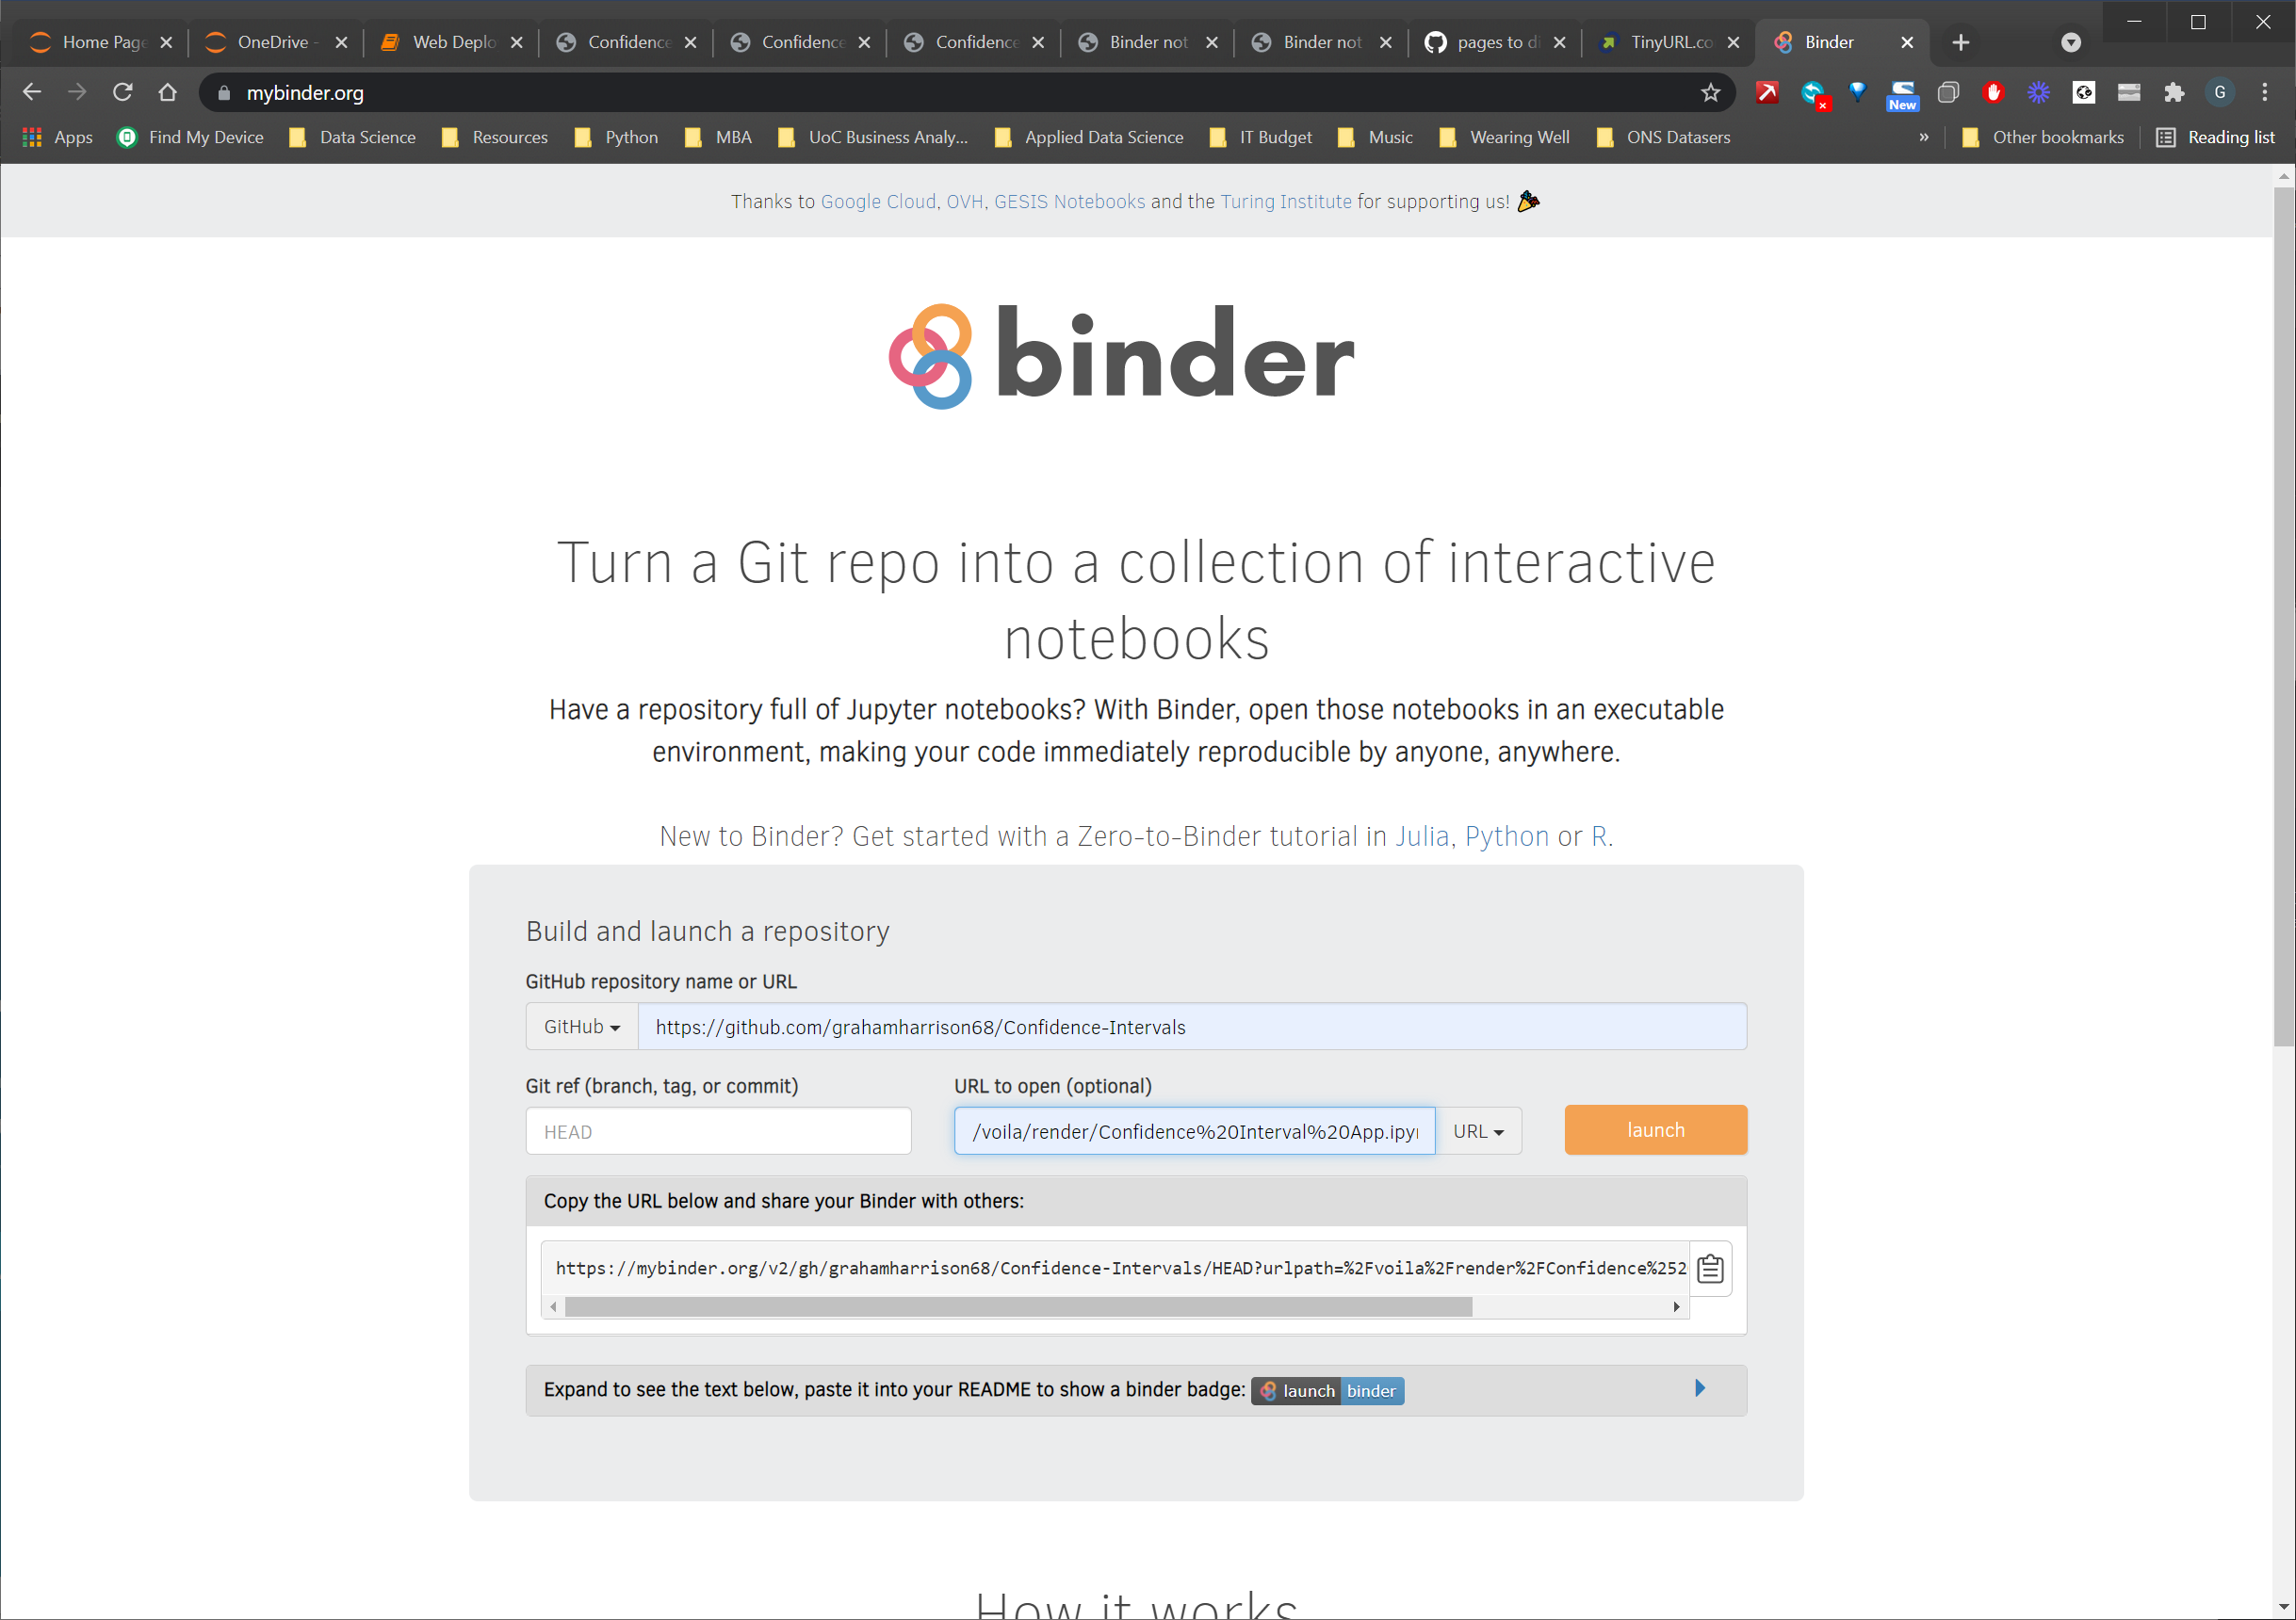
Image by Author

After you click on "launch" it will take mybinder a little while to build and deploy the environment. During the build you will see various messages output to a console window and when it completes you will see your finished web application in a browser window ...

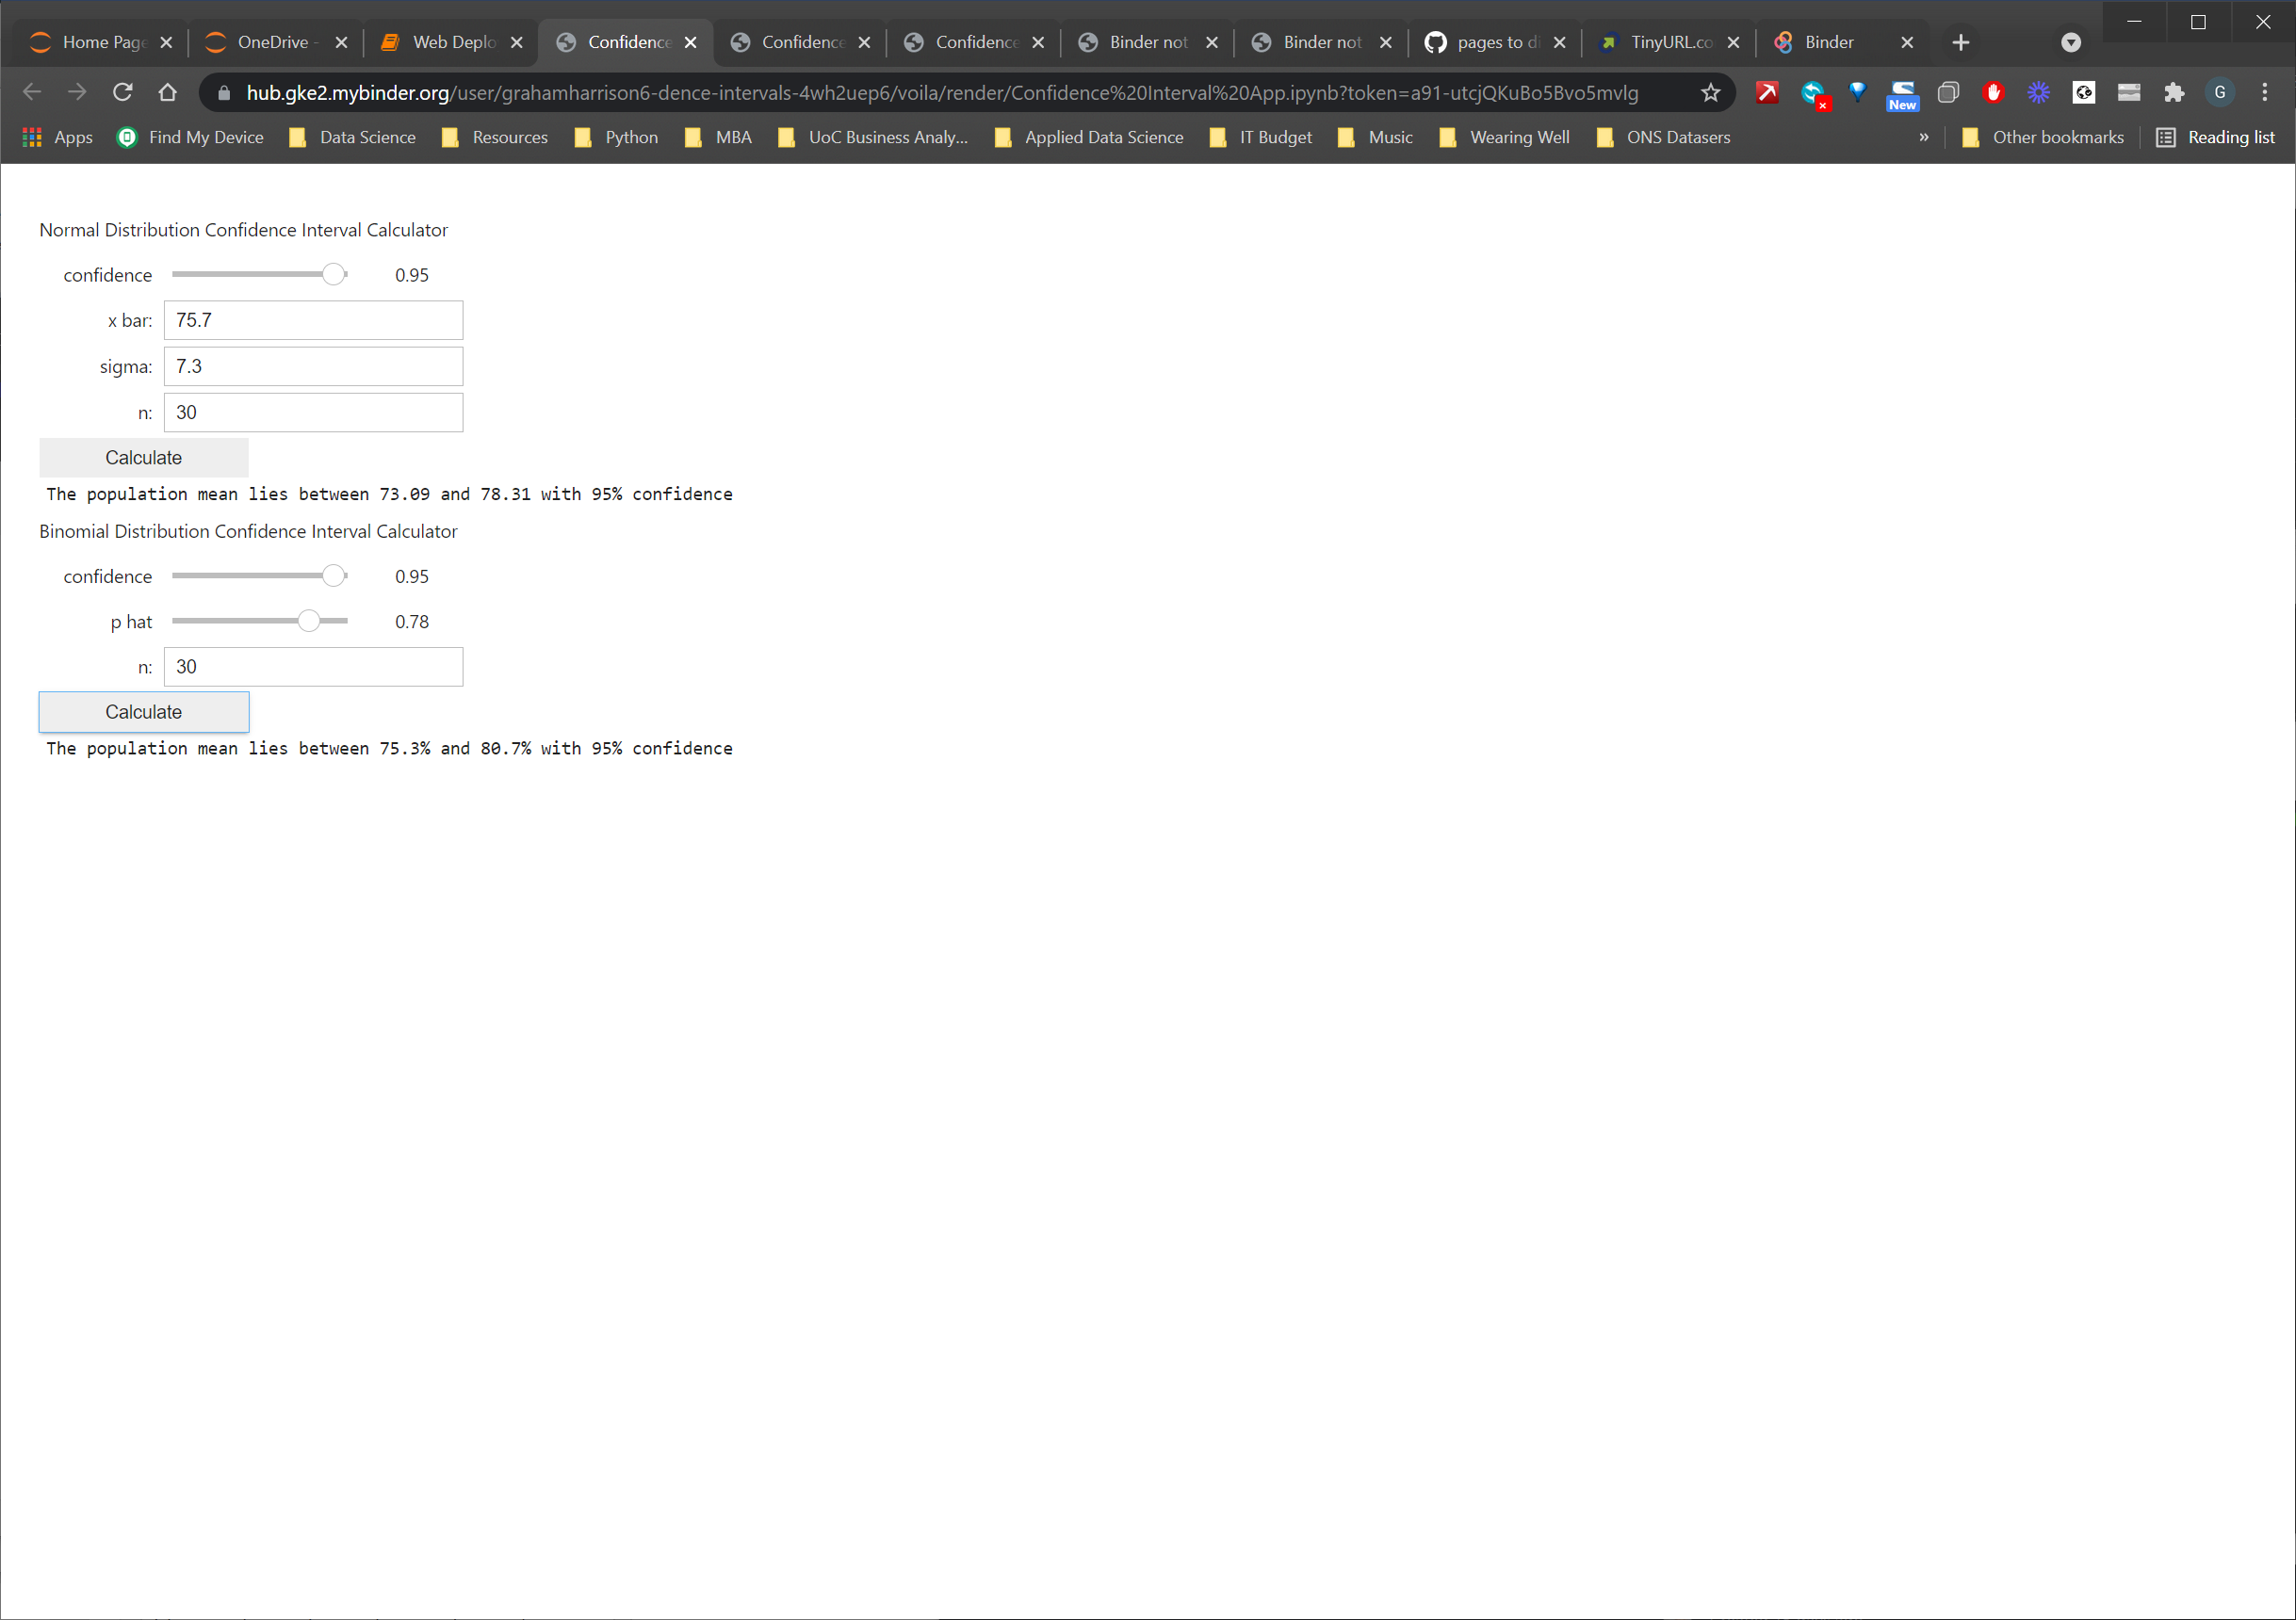
Image by Author

#### Step 4.3 Make a tinyurl out of the web application URL

It is critically important to note that the correct URL is the one that was copied into the paste buffer in Step 4.2, numbered item 4 and not the URL which is displayed in the URL bar of the browser. A correct URL looks like this -

https://mybinder.org/v2/gh/grahamharrison68/Confidence-Intervals/HEAD?urlpath=%2Fvoila%2Frender%2FConfidence%2520Interval%2520App.ipynb

Every time you or a user accesses the correct URL it resolves into a different final URL in the browser but the one copied into the paste buffer in Step 4.3 is permanent and can be converted into a tinyurl by visiting https://tinyurl.com/app/ ...


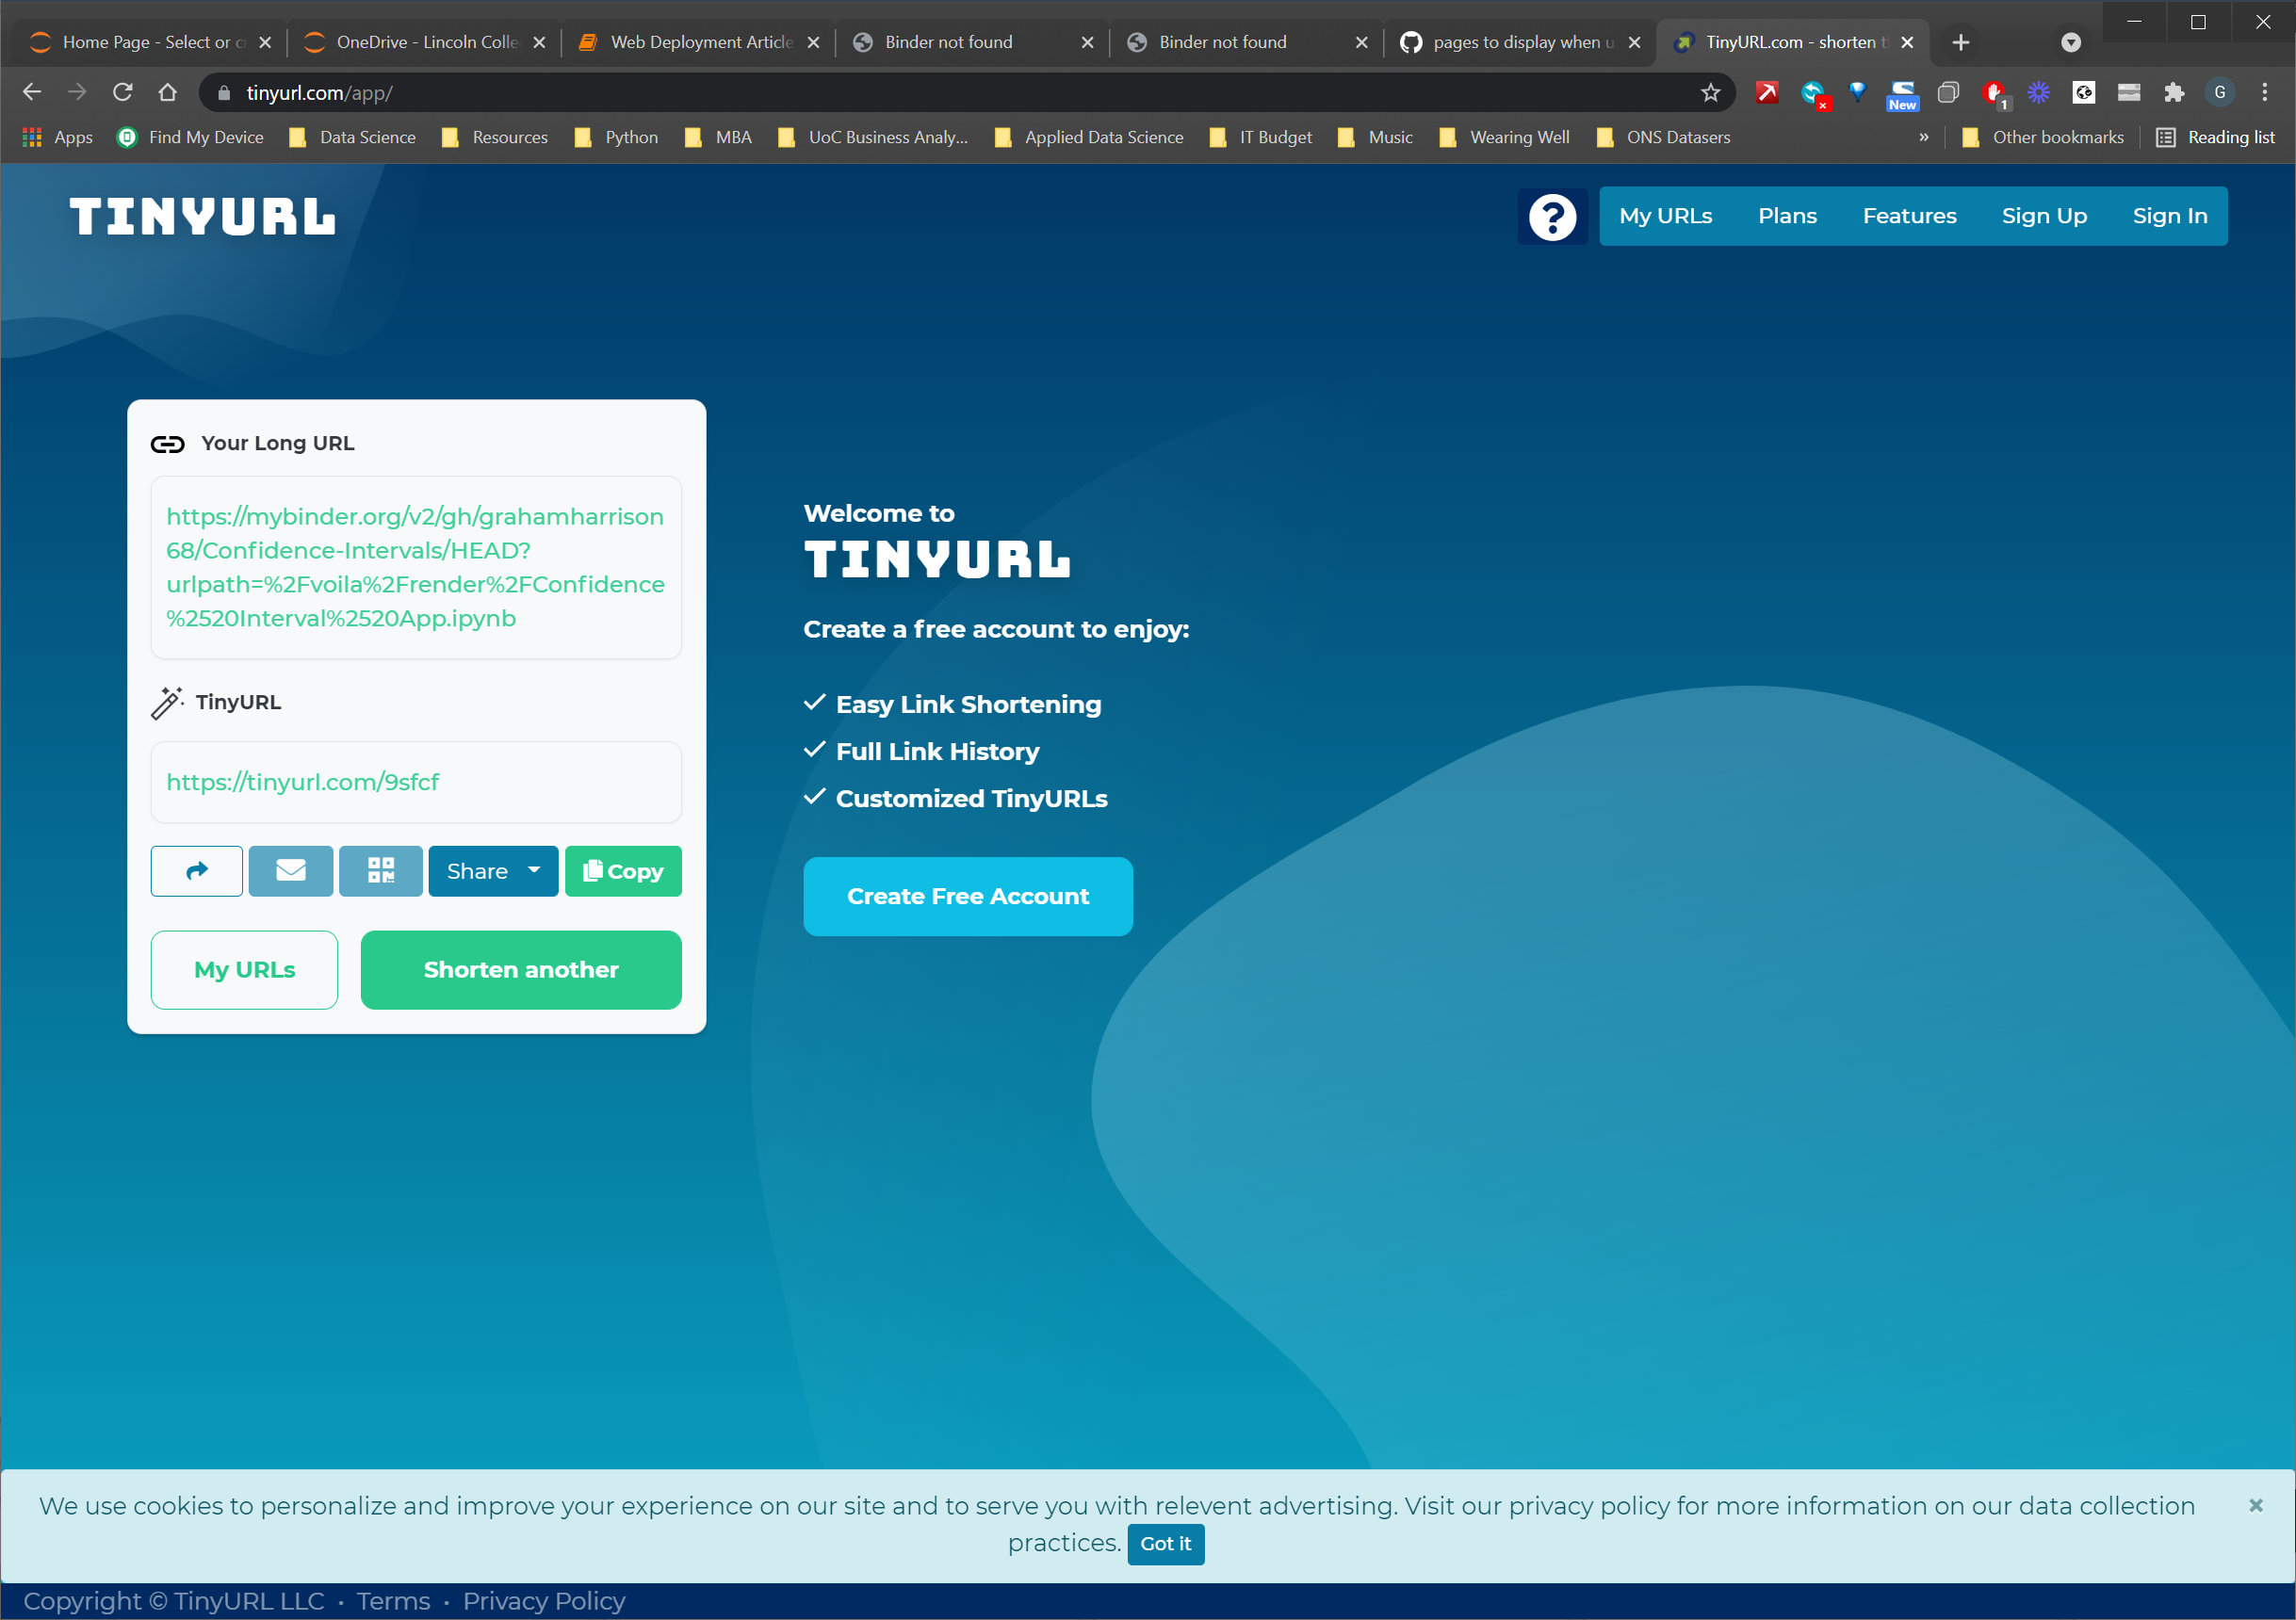
Image by Author

You can try out my completed and deployed confidence interval calculator by accessing this link - https://tinyurl.com/9sfcf

### Conclusion

There are quite a few steps involved and you do have to get them all correct to achieve the outcome, but that outcome is worth the effort!

Once you have deployed a machine learning or data science application this way a single time it only takes moments to do the next one and then what you have is a fast, efficient, free and easy-to-use way of sharing your Jupyter Notebooks as fully functioning web applications to your customers, colleagues and peers.

One draw-back I have noticed is that there is no way to publish a public web application but to keep the programme code private; you have to make your code public in the GitHub repository you create or the mybinder stage does not work.

That may be a future feature for mybinder and I imagine at some stage they may release paid-for versions with additional features where things like this can be done.

The other main drawback is that the process is a bit clunky and it is easy to make the mistake of not changing the "File" dropdown to "URL" in the mybinder.org page which stops the web application from opening if you get it wrong.

As a final tip I always put the bear minimum of code in the GitHub repository for the app and only publish it once I am satisfied it is complete so that it does not need constantly re-publishing which might impact the end users you have distributed the link to.

In summary though, it is a relatively straight forward process once you learn the quirks and if you follow the steps documented in this article it should work every time.

You can download the full source code from my GitHub repositories 
- https://github.com/grahamharrison68/Confidence-Intervals
- https://github.com/grahamharrison68/Public-Github/tree/master/Web%20Deployment

### Thank you for reading!

If you enjoyed reading this article, why not check out my other articles at https://grahamharrison-86487.medium.com/?
Also, I would love to hear from you to get your thoughts on this piece, any of my other articles or anything else related to data science and data analytics.

If you would like to get in touch to discuss any of these topics please look me up on LinkedIn — https://www.linkedin.com/in/grahamharrison1 or feel free to e-mail me at GHarrison@lincolncollege.ac.uk.

If you would like to support the author and 1000’s of others who contribute to article writing world-wide by subscribing, please use this link — https://grahamharrison-86487.medium.com/membership (note: the author will receive a proportion of the fees if you sign up using this link).